<a href="https://colab.research.google.com/github/MRaynardAlif/BritishAirlineReviewAnalysis/blob/main/Raynard_AirlineReviewsScrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
import shutil

url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9',
    'Host': 'www.airlinequality.com',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'X-Amzn-Trace-Id': 'Root=1-64bb4db9-5d422ce87666e6297a5815cd'
}

page = requests.get(url, headers=headers)

soup1 = BeautifulSoup(page.content, 'html.parser')
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
print(soup2)



<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>
   British Airways Customer Reviews - SKYTRAX
  </title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-icon-touch.png" rel="a

In [ ]:
reviews_elements = soup2.find_all(itemprop='review')

# Initialize a list to store the scraped text
reviews_text = []

# Iterate through the review elements and extract the text
for review_element in reviews_elements:
    review_text = review_element.get_text(strip=True)
    reviews_text.append(review_text)

# Print or process the scraped text as needed
for review_text in reviews_text:
    print(review_text)

1/10"Zero empathy was shown"B McIver(Germany)21st July 2023✅Trip Verified| A simple story with an unfortunate outcome that really could happen to anyone. My partner and I recently started working after studying purchased two tickets to travel from London City Airport to Frankfurt. When we purchased the tickets, I mistakenly entered my name twice (e.g. Mr John Smith and Ms John Smith). Little did we know that our 1 simple mistake would cost us over 300 pounds. Upon arriving at the airport we were told there was no way to change the name (apparently they can only change 3 letters where there has been a typo?) and I had no other option to purchase the last remaining ticket if I wanted to board the flight - the price: almost seven times (!) higher than my original ticket. Zero empathy was shown. Zero alternative was offered. Trusting BA's staff and under the pretence that there was apparently no other way we could board the flight we bought this ticket. Immediately after I purchased the ti

In [ ]:
ratings = soup2.find_all(itemprop='ratingValue')
ratingsText = []

for rating in ratings:
  ratingText = rating.get_text(strip=True)
  ratingsText.append(ratingText)

for ratingText in ratingsText:
  print(ratingText)


5
1
4
8
2
2
1
9
1
2
4
2
2
4
1
1
3
3
10
1
1
2
1
1
1
1
2
4
7
1
1
7
1
1
2
1
3
1
1
1
3
1
4
1
2
9
3
1
1
2
10
1
1
9
2
1
10
10
2
4
2
1
1
1
3
3
1
1
1
1
2
5
1
2
1
1
10
2
5
1
3
4
3
1
1
2
1
9
5
1
2
7
4
1
3
9
10
1
3
1
1


In [ ]:
reviews_data = []

# Iterate through the review elements and extract the desired data
for review_element in reviews_elements:
    review_date = review_element.find('meta', itemprop='datePublished')['content']
    rating_element = review_element.find(itemprop='reviewRating')
    rating_value = rating_element.find(itemprop='ratingValue').text
    best_rating = rating_element.find(itemprop='bestRating').text
    review_text = review_element.find('div', class_='body').find('h2', class_='text_header').text.strip()
    reviewer_name = review_element.find('span', itemprop='author').text
    reviewer_location = review_element.find('h3', class_='text_sub_header userStatusWrapper').text.split("(")[-1].strip(")")

    review_data = {
        'Date': review_date,
        'Rating': f"{rating_value}/{best_rating}",
        'Text': review_text,
        'Reviewer Name': reviewer_name,
        'Reviewer Location': reviewer_location,
    }
    reviews_data.append(review_data)

# Save the scraped data to a CSV file
csv_filename = 'scraped_AirlineReviews.csv'
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Date', 'Rating', 'Text', 'Reviewer Name', 'Reviewer Location']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for review in reviews_data:
        writer.writerow(review)

# Provide a download link for the user
download_link = f'<a href="{csv_filename}" download>Click here to download the CSV file</a>'
print(download_link)

<a href="scraped_AirlineReviews.csv" download>Click here to download the CSV file</a>


         Date                                             Rating  \
0  2023-07-21  \n            1\n           /\n            10\...   
1  2023-07-21  \n            4\n           /\n            10\...   
2  2023-07-20  \n            8\n           /\n            10\...   
3  2023-07-20  \n            2\n           /\n            10\...   
4  2023-07-20  \n            2\n           /\n            10\...   

                                           Text  \
0                      "Zero empathy was shown"   
1    "pilot apologise at every step of the way"   
2     "crew were always ready to top up drinks"   
3              "The service is really mediocre"   
4  "made their economy experience so miserable"   

                                   Reviewer Name  \
0    \n\n              B McIver\n             \n   
1     \n\n              D Keane\n             \n   
2  \n\n              Alan Lacey\n             \n   
3     \n\n              K Malec\n             \n   
4  \n\n              Ala

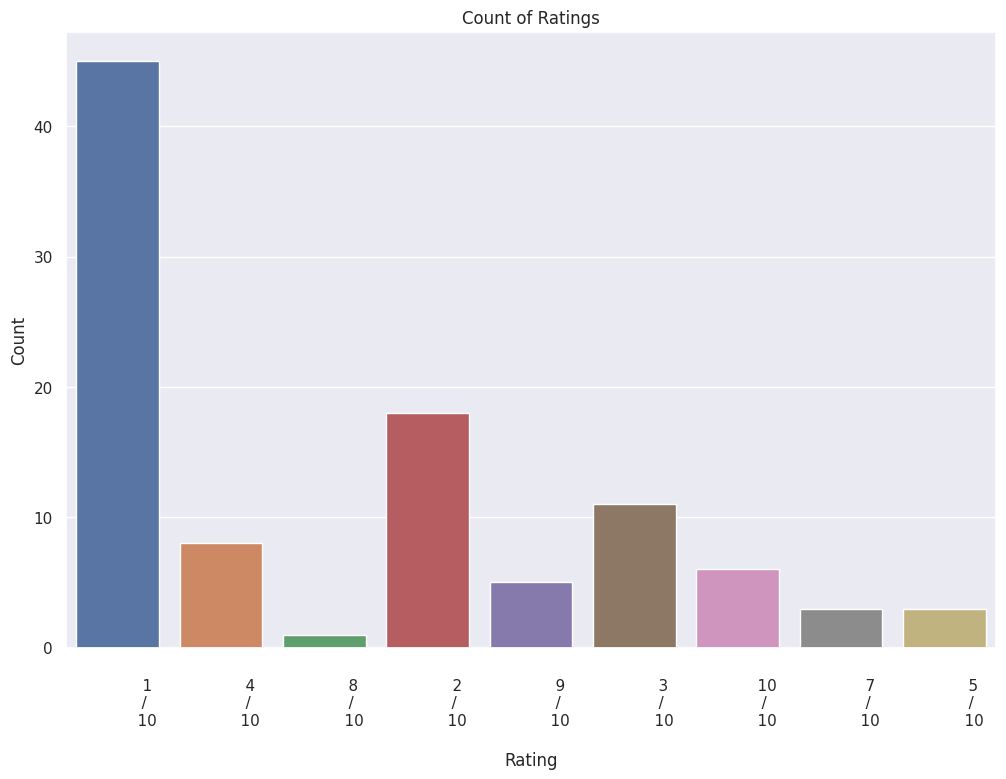

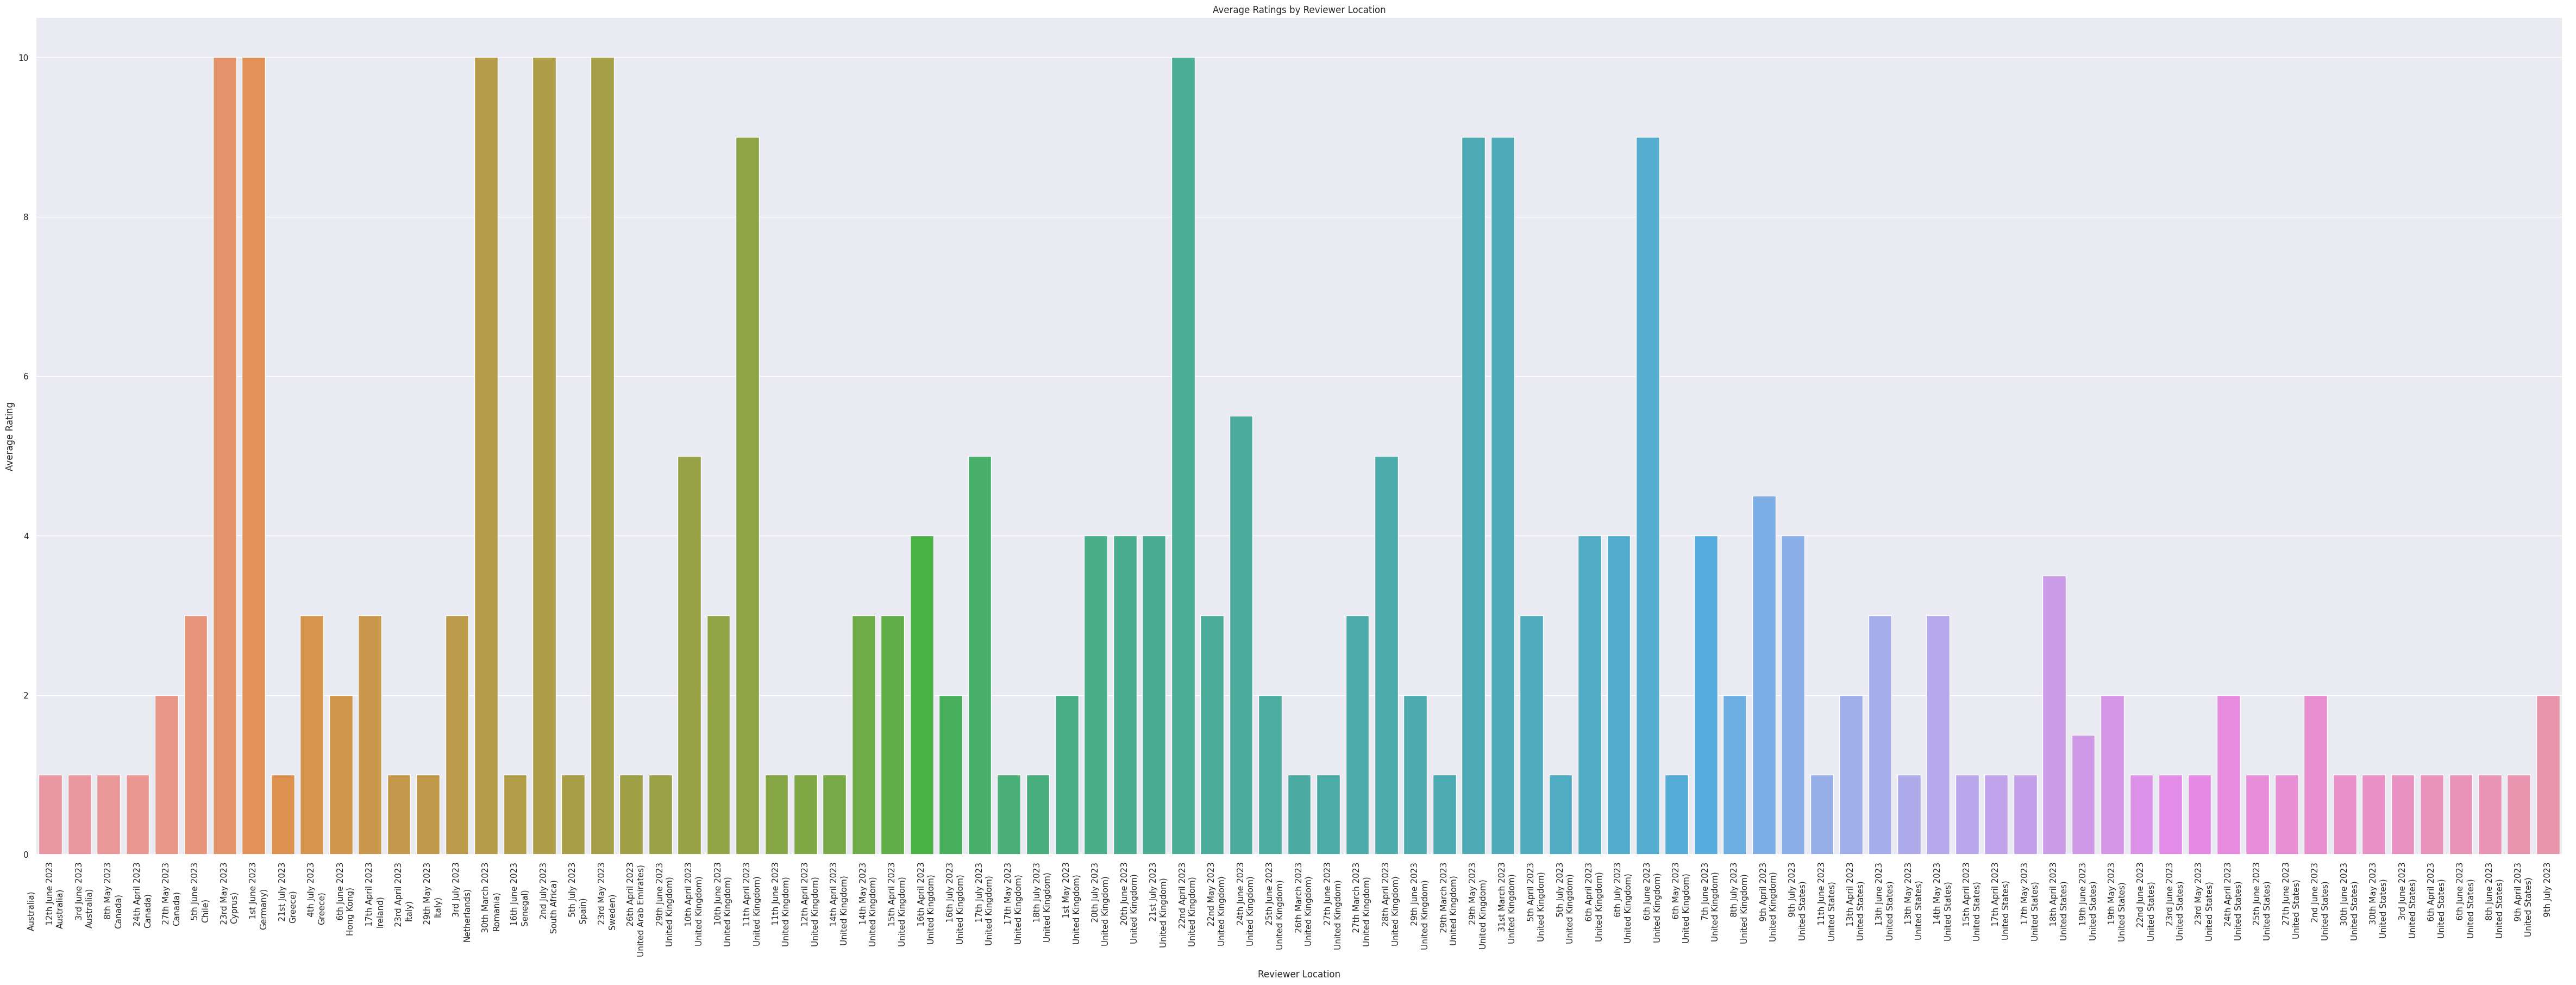

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a pandas DataFrame
csv_file = 'scraped_reviews.csv'
df = pd.read_csv(csv_file)

# Split the "Rating" column into numerator and denominator
df[['Rating Numerator', 'Rating Denominator']] = df['Rating'].str.split('/', expand=True)

# Convert the columns to numeric types
df['Rating Numerator'] = pd.to_numeric(df['Rating Numerator'])
df['Rating Denominator'] = pd.to_numeric(df['Rating Denominator'])

# View the first few rows of the DataFrame with the updated columns
print(df.head())

# Plot a count plot of ratings
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.countplot(x='Rating', data=df)
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot a bar chart of average ratings per reviewer location
avg_ratings_by_location = df.groupby('Reviewer Location')['Rating Numerator'].mean().reset_index()
plt.figure(figsize=(60, 20))
sns.barplot(x='Reviewer Location', y='Rating Numerator', data=avg_ratings_by_location)
plt.xticks(rotation=90)
plt.title('Average Ratings by Reviewer Location')
plt.xlabel('Reviewer Location')
plt.ylabel('Average Rating')
plt.show()